Нам предоставлены социально-демографические данные по заемщику  от "Ак Барс Банка".

**Задача**, которую нужно решить - построение модели оценки дохода потенциального клиента, то есть на выходе мы должны получить прогнозное значение дохода.


Подключаем нужные для работы библиотеки

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from pandas import DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from google.colab import drive
drive.mount('/content/drive')

warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Работа с данными

## Таблица 3A(соц. демографические данные)

Таблица о предоставленных данных

|              	|                                      Данные                                     	|
|:------------:	|:-------------------------------------------------------------------------------:	|
| NaturalPersonID         	| ID заявки                                     	|
| RequestDate    	| Дата заявки                                                          	|
| ProductName     	| Тип заявки                                                                      	|
| CreditSum    	| Сумма кредита                                                              	|
| TypeOfWork      	| Тип работника                                               	|
| Employment   	| Должность                                                                    	|
| SignIP 	| Наличие ИП                                                                    	|
| sex      	| Пол                                                                 	|
| age     	| возраст                                             	|
| EducationStatus   	| данные об образовании                      	|
| otrasl_rabotodatelya     	|  отрасль работы                                                	|
| kolichestvo_rabotnikov_v_organizacii       	| количество работников в организации                                                           	|
| kolichestvo_detej_mladshe_18   	| количество детей младше 18 	|
| LivingRegionName| название региона |
|Residence | вид жительства|
|IncomeDocumentKind|Вид документа о доходах|
|HaveSalaryCard|наличие зарплатной карты|
|IsBankWorker| Банковский рабочий|
|harakteristika_tekutschego_trudoustrojstva| характеристика трудойустройства|
|ConfirmedMonthlyIncome (Target)| Месячный доход|

Загружаем наши данные из .csv файла

In [ ]:
 data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Science_project/data/data.csv', delimiter=',')

Смотрим на размер наших данных в таблице, и на то какие данные мы имеем.

In [ ]:
# Размер дата фрейма
print('Размер Dataframe: ', data.shape)
data.head(15)


Размер Dataframe:  (10719, 24)


,NaturalPersonID,RequestDate,ProductName,CreditSum,TypeOfWork,Employment,SignIP,sex,age,EducationStatus,otrasl_rabotodatelya,kolichestvo_rabotnikov_v_organizacii,Employment.1,OrgStanding_N,kolichestvo_detej_mladshe_18,LivingRegionName,Residence,IncomeDocumentKind,HaveSalaryCard,IsBankWorker,TypeOfWork.1,SignIP.1,harakteristika_tekutschego_trudoustrojstva,ConfirmedMonthlyIncome (Target)
0,1ABD801A-0580-4C4F-9682-E7E85A749981,10/16/2018,Кредит на потребительские нужды,500000,NaN,Сотрудник \ Рабочий \ Ассистент,NaN,Женский,49,Высшее образование,Прочее,более 500,Сотрудник \ Рабочий \ Ассистент,"1,25",0,Самара,город,Выписка по счету,нет,да,NaN,NaN,"Постоянная, полная занятость","30691,36"
1,7B427911-9B96-443E-9EBA-76A02515E1BE,10/19/2018,Кредит на потребительские нужды,708000,NaN,Главный Специалист\Руководитель среднего звена,NaN,Женский,44,Среднее специальное образование,Государственная служба,до 20,Главный Специалист\Руководитель среднего звена,20,0,Казань,село,Выписка по счету,да,нет,NaN,NaN,"Постоянная, полная занятость","25712,07"
2,4B867BD5-6398-4400-99CA-CF208714AF9A,11/2/2018,Кредит на потребительские нужды,665000,NaN,Сотрудник \ Рабочий \ Ассистент,NaN,Мужской,29,Высшее образование,Прочее,101-500,Сотрудник \ Рабочий \ Ассистент,2,1,Казань,город,Выписка по счету,да,нет,NaN,NaN,"Постоянная, полная занятость","31081,26"
3,ED654BFA-A7E7-4280-84CA-D6EAE80E45E2,11/2/2018,Кредит на потребительские нужды,458000,NaN,Сотрудник \ Рабочий \ Ассистент,NaN,Женский,59,Несколько высших образований,Образование,21-100,Сотрудник \ Рабочий \ Ассистент,23,0,Зеленодольский,село,2-НДФЛ,да,нет,NaN,NaN,"Постоянная, полная занятость","17848,79"
4,CCA3FF37-D508-449E-869A-6ED4CB6F9943,10/15/2018,Кредит на потребительские нужды,969000,NaN,Сотрудник \ Рабочий \ Ассистент,NaN,Мужской,51,Высшее образование,Здравоохранение,более 500,Сотрудник \ Рабочий \ Ассистент,"9,25",2,Тюмень,город,2-НДФЛ,нет,нет,NaN,NaN,"Постоянная, полная занятость","115380,53"
5,939468E5-ABD5-4130-A435-08A65EC0082B,11/13/2018,Кредитная карта,35000,NaN,Сотрудник \ Рабочий \ Ассистент,NaN,Мужской,35,Высшее образование,Финансовые институты,более 500,Сотрудник \ Рабочий \ Ассистент,"5,5",0,Омск,город,Выписка по счету,да,нет,NaN,NaN,"Постоянная, полная занятость","39578,97"
6,B252CDCB-DFC2-48BF-80B5-EDC024CAFDF3,10/25/2018,Кредит на потребительские нужды,701000,NaN,Главный Специалист\Руководитель среднего звена,NaN,Мужской,54,Высшее образование,Прочее,101-500,Главный Специалист\Руководитель среднего звена,"1,5",0,Чистопольский,город,Выписка по счету,да,нет,NaN,NaN,"Постоянная, полная занятость","50052,42"
7,A767733A-9578-4DF5-96F5-D45A712327FC,11/12/2018,Кредит на потребительские нужды,710000,Собственное дело,Руководитель высшего звена,ИП,Мужской,34,Высшее образование,"Архитектура, проектирование и конструирование",до 20,Руководитель высшего звена,"9,25",2,Самара,город,Справка по форме Банка от работодателя,нет,нет,Собственное дело,ИП,"Постоянная, полная занятость",100050
8,1BF342ED-F3DB-4F73-BBF0-F47EDFB93249,11/12/2018,Кредит на потребительские нужды,240000,NaN,Сотрудник \ Рабочий \ Ассистент,NaN,Мужской,26,Среднее специальное образование,Прочее,более 500,Сотрудник \ Рабочий \ Ассистент,"3,916666",0,Чебоксары,город,2-НДФЛ,нет,нет,NaN,NaN,"Постоянная, полная занятость","34000,58"
9,643A87DE-FA60-48EA-903B-1E383A3297CE,11/7/2018,Кредит на потребительские нужды,120400,NaN,Сотрудник \ Рабочий \ Ассистент,NaN,Мужской,23,Среднее специальное образование,Прочее,более 500,Сотрудник \ Рабочий \ Ассистент,3,0,Нижнекамский,город,NaN,нет,нет,NaN,NaN,"Постоянная, полная занятость","47266,04"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10719 entries, 0 to 10718
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   NaturalPersonID                             10719 non-null  object
 1   RequestDate                                 10719 non-null  object
 2   ProductName                                 10719 non-null  object
 3   CreditSum                                   10713 non-null  object
 4   TypeOfWork                                  6151 non-null   object
 5   Employment                                  10716 non-null  object
 6   SignIP                                      72 non-null     object
 7   sex                                         10719 non-null  object
 8   age                                         10719 non-null  int64 
 9   EducationStatus                             10719 non-null  object
 10  otrasl_rabotodatelya  

Замечаем дубликаты колонок в нашем DataFrame.

In [ ]:
# убираем дубликаты столбцов
data.drop("Employment.1", axis=1, inplace=True)
data.drop("TypeOfWork.1", axis=1, inplace=True)
data.drop("SignIP.1", axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10719 entries, 0 to 10718
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   NaturalPersonID                             10719 non-null  object
 1   RequestDate                                 10719 non-null  object
 2   ProductName                                 10719 non-null  object
 3   CreditSum                                   10713 non-null  object
 4   TypeOfWork                                  6151 non-null   object
 5   Employment                                  10716 non-null  object
 6   SignIP                                      72 non-null     object
 7   sex                                         10719 non-null  object
 8   age                                         10719 non-null  int64 
 9   EducationStatus                             10719 non-null  object
 10  otrasl_rabotodatelya  

In [ ]:
# преобразуем nan
data['TypeOfWork'] = data.TypeOfWork.fillna('нет данных').astype(str)
data["Residence"] = data["Residence"].fillna('нет данных').astype(str)
data['SignIP'] = data.SignIP.fillna('нет данных').astype(str)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10350 entries, 0 to 10718
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   NaturalPersonID                             10350 non-null  object
 1   RequestDate                                 10350 non-null  object
 2   ProductName                                 10350 non-null  object
 3   CreditSum                                   10350 non-null  object
 4   TypeOfWork                                  10350 non-null  object
 5   Employment                                  10350 non-null  object
 6   SignIP                                      10350 non-null  object
 7   sex                                         10350 non-null  object
 8   age                                         10350 non-null  int64 
 9   EducationStatus                             10350 non-null  object
 10  otrasl_rabotodatelya  

Преобразуем данные с ',' в тип float

In [ ]:
# меняем тип данных на float
data["CreditSum"] = data["CreditSum"].str.replace(',', '.').astype(float)
data["OrgStanding_N"] = data["OrgStanding_N"].str.replace(',', '.').astype(float)
data["ConfirmedMonthlyIncome (Target)"] = data["ConfirmedMonthlyIncome (Target)"].str.replace(',', '.').astype(
    float)

Используем LabelEncoder для преобразования некотрых данных c большими уникальными значениями в тип int,также поработем и над данными, разделив их на месяц,день,год

In [ ]:
label = LabelEncoder()
dicts = {}

label.fit(data.otrasl_rabotodatelya)
dicts['otrasl_rabotodatelya'] = list(label.classes_)
data.otrasl_rabotodatelya = label.transform(data.otrasl_rabotodatelya)

# one_encode = pd.get_dummies(data.otrasl_rabotodatelya, prefix='otrasl_rabotodatelya').astype(int)
# one_encode = pd.DataFrame(one_encode)
# data = pd.concat([data, one_encode], axis=1).drop(['otrasl_rabotodatelya'], axis=1)

label.fit(data.IncomeDocumentKind)
dicts['IncomeDocumentKind'] = list(label.classes_)
data.IncomeDocumentKind = label.transform(data.IncomeDocumentKind)

# one_encode = pd.get_dummies(data['IncomeDocumentKind'],prefix='IncomeDocumentKind').astype(int)
# one_encode = pd.DataFrame(one_encode)
# data = pd.concat([data, one_encode], axis=1).drop(['IncomeDocumentKind'], axis=1)

label.fit(data.LivingRegionName)
dicts['LivingRegionName'] = list(label.classes_)
data.LivingRegionName = label.transform(data.LivingRegionName)

data['month'] = data['RequestDate'].apply(lambda x: x.split('/')[0]).astype(int)
data['day'] = data['RequestDate'].apply(lambda x: x.split('/')[1]).astype(int)
data['year'] = data['RequestDate'].apply(lambda x: x.split('/')[2]).astype(int)
data.drop(['RequestDate'], axis=1, inplace=True)

Здесь работаем с некоторыми данными вручную, зараннее создав для них словари

In [ ]:
# получаем уникальные значения
uniq = data.EducationStatus.unique()
# создаем словарик приоритета образования
education_priority = {
    'Незаконченное среднее образование': 1,
    'Среднее образование': 2,
    'Среднее специальное образование': 3,
    'Незаконченное высшее образование': 4,
    'Высшее образование': 5,
    'Несколько высших образований': 6,
    'Академическая степень (кандидат наук, доктор наук и т.д.)': 7
}
data.EducationStatus = data.EducationStatus.replace(to_replace=education_priority)

residence_dict = {
    'город': 2,
    'село': 1,
    'нет данных': 0
}

sign_ip = {
    'нет данных': 0,
    'ИП': 1
}

type_of_work = {
    'нет данных': 0,
    'Собственное дело': 3,
    'по найму': 1,
    'Индивидуальный предприниматель': 4,
    'Агент на комиссионом договоре': 2
}

sex_dict = {
    'Женский': 1,
    'Мужской': 2
}
product_name = {
    'Кредит на потребительские нужды': 1,
    'Кредитная карта': 2
}

bank_worker = {
    'нет': 0,
    'да': 1,
}

number_worker = {
    'нет данных': 0,
    'до 20': 1,
    '21-100': 2,
    '101-500': 3,
    'более 500': 4
}

type_employment = {
    'нет данных': 0,
    'Сотрудник \\ Рабочий \\ Ассистент': 1,
    'Главный Специалист\\Руководитель среднего звена': 2,
    'Руководитель высшего звена': 3,
    'Эксперт\\Старший или Ведущий Специалист': 4,
    'Индивидуальный предприниматель': 5
}

character_work = {
    'Постоянная, полная занятость': 2,
    'Частичная или временная занятость': 1,
    'нет данных': 0
}
salary_card = {
    'нет': 0,
    'да': 1
}

data.SignIP = data.SignIP.replace(to_replace=sign_ip)
data['TypeOfWork'] = data.TypeOfWork.replace(to_replace=type_of_work)
data.Residence = data.Residence.replace(to_replace=residence_dict)
data.sex = data.sex.replace(to_replace=sex_dict)
data.ProductName = data.ProductName.replace(to_replace=product_name)
data.IsBankWorker = data.IsBankWorker.replace(to_replace=bank_worker)
data.kolichestvo_rabotnikov_v_organizacii = data.kolichestvo_rabotnikov_v_organizacii.replace(
    to_replace=number_worker)
data.Employment = data.Employment.replace(to_replace=type_employment)
data.harakteristika_tekutschego_trudoustrojstva = data.harakteristika_tekutschego_trudoustrojstva.replace(
    to_replace=character_work)
data.HaveSalaryCard = data.HaveSalaryCard.replace(to_replace=salary_card)


Смотрим на получившиеся результаты и записываем преобразования в отдельную табличку 

In [ ]:
data.info()
data.shape
data.head(5)

data.to_csv(r'/content/drive/MyDrive/Colab Notebooks/Science_project/data/update_data.csv', encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10350 entries, 0 to 10718
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   NaturalPersonID                             10350 non-null  object 
 1   ProductName                                 10350 non-null  int64  
 2   CreditSum                                   10350 non-null  float64
 3   TypeOfWork                                  10350 non-null  int64  
 4   Employment                                  10350 non-null  int64  
 5   SignIP                                      10350 non-null  int64  
 6   sex                                         10350 non-null  int64  
 7   age                                         10350 non-null  int64  
 8   EducationStatus                             10350 non-null  int64  
 9   otrasl_rabotodatelya                        10350 non-null  int64  
 10  kolichestv

## Таблица 3b(данные о транзакциях)

---



Загружаем наши данные из .csv файла

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Science_project/data/transaction_table.csv')

Смотрим информацию о данных в столбцах

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798113 entries, 0 to 798112
Data columns (total 14 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   Идентификатор Клиента                                    798113 non-null  object 
 1   Тип операции                                             798113 non-null  object 
 2   Направление транзакции                                   798113 non-null  int64  
 3   Дата транзакции                                          798113 non-null  object 
 4   Сумма транзакции                                         798113 non-null  float64
 5   Валюта транзакции                                        798113 non-null  object 
 6   Сумма транзакции в валюте платежной системы              798113 non-null  float64
 7   Валюта платежной системы                                 798113 non-null  object 
 8   MCC-код транза

Считаем сумму пустых ячеек в таблице(сумма != 0)

In [ ]:
print(data.isnull().sum())

Идентификатор Клиента                                          0
Тип операции                                                   0
Направление транзакции                                         0
Дата транзакции                                                0
Сумма транзакции                                               0
Валюта транзакции                                              0
Сумма транзакции в валюте платежной системы                    0
Валюта платежной системы                                       0
MCC-код транзакции                                             0
MCC-код транзакции (наименование)                              0
Бизнес-тип операции                                            0
Признак принадлежности транзакции в банкомате АББ              0
Признак принадлежности транзакции в стороннем банкомате        0
Тип карты                                                  11955
dtype: int64


Преобразуем пустые ячейки в столбце 'Тип карты'

In [ ]:
data['Тип карты'] = data['Тип карты'].fillna('no data').astype(str)

Проверяем, что пустых ячеек не осталось

In [ ]:
print(data.isnull().sum())

Идентификатор Клиента                                      0
Тип операции                                               0
Направление транзакции                                     0
Дата транзакции                                            0
Сумма транзакции                                           0
Валюта транзакции                                          0
Сумма транзакции в валюте платежной системы                0
Валюта платежной системы                                   0
MCC-код транзакции                                         0
MCC-код транзакции (наименование)                          0
Бизнес-тип операции                                        0
Признак принадлежности транзакции в банкомате АББ          0
Признак принадлежности транзакции в стороннем банкомате    0
Тип карты                                                  0
dtype: int64


Теперь преобразуем данные в столбцах с типо object в тип int для дальнейшего анализа

In [ ]:
# Применяем OHE(One Hot Encoding) к столбцам нашего DataFrame
data = pd.get_dummies(data, columns=['Валюта транзакции'])
data = pd.get_dummies(data, columns=['Бизнес-тип операции'])
data = pd.get_dummies(data, columns=['Тип карты'])

# В столбце 'Тип операции' есть всего два значения, которые меняем на цифры 0 и 1
data.loc[data['Тип операции'] == 'Transaction', 'Тип операции'] = 0
data.loc[data['Тип операции'] == 'Misc', 'Тип операции'] = 1

# Меняем тип данных в столбце
data['Тип операции'] = data['Тип операции'].astype(int)

# Удаляем повторные и не нужные столбцы
data = data.drop('Валюта платежной системы', 1)
data = data.drop('MCC-код транзакции (наименование)', 1)

# Столбец 'Дата транзакции' преоьразуем в 3: 'month', 'day' и 'year'
data['month'] = data['Дата транзакции'].apply(lambda x: x.split('/')[0]).astype(int)
data['day'] = data['Дата транзакции'].apply(lambda x: x.split('/')[1]).astype(int)
data['year'] = data['Дата транзакции'].apply(lambda x: x.split('/')[2]).astype(int)

# Удаляем столбец 'Дата транзакции'
data = data.drop('Дата транзакции', 1)

Проверяем, что все столбцы имеют тип данных int кроме, индентификатора клиента

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798113 entries, 0 to 798112
Data columns (total 56 columns):
 #   Column                                                                        Non-Null Count   Dtype  
---  ------                                                                        --------------   -----  
 0   Идентификатор Клиента                                                         798113 non-null  object 
 1   Тип операции                                                                  798113 non-null  int64  
 2   Направление транзакции                                                        798113 non-null  int64  
 3   Сумма транзакции                                                              798113 non-null  float64
 4   Сумма транзакции в валюте платежной системы                                   798113 non-null  float64
 5   MCC-код транзакции                                                            798113 non-null  int64  
 6   Признак принадлежнос

Строим корреляционную матрицу из нашего преоьразованного DataFrame

In [ ]:
data.corr().style.format("{:.2}").background_gradient(cmap='coolwarm', axis=1)

Удаляем столбцы, которые сильно коррелируют

In [ ]:
delete_columns = ['Валюта транзакции_ Не определено в системе', 'Признак принадлежности транзакции в банкомате АББ', 'Признак принадлежности транзакции в стороннем банкомате', 'Бизнес-тип операции_Прочее']
data = data.drop(delete_columns, 1)

# Построение моделей

Загружаем обработанные данные, убираем ненужные колонки

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Science_project/data/update_data.csv', delimiter=',')

data.drop('Unnamed: 0', inplace=True, axis=1)
data = data.drop(['NaturalPersonID'], axis=1)

## Бивариатный анализ




>Корреляция – связь между двумя метрическими переменными. При построении корреляции, мы ищем признаки, зависимые друг от друга или каким-либо образом влияющие на значения друг друга. Если корреляция между признаками по модулю высокая, они будут "мешаться" друг другу при обучении линейной модели, потому что вносят похожую информацию.  Удобное представление коэффициентов корреляции - тепловая карта, представленная ниже.





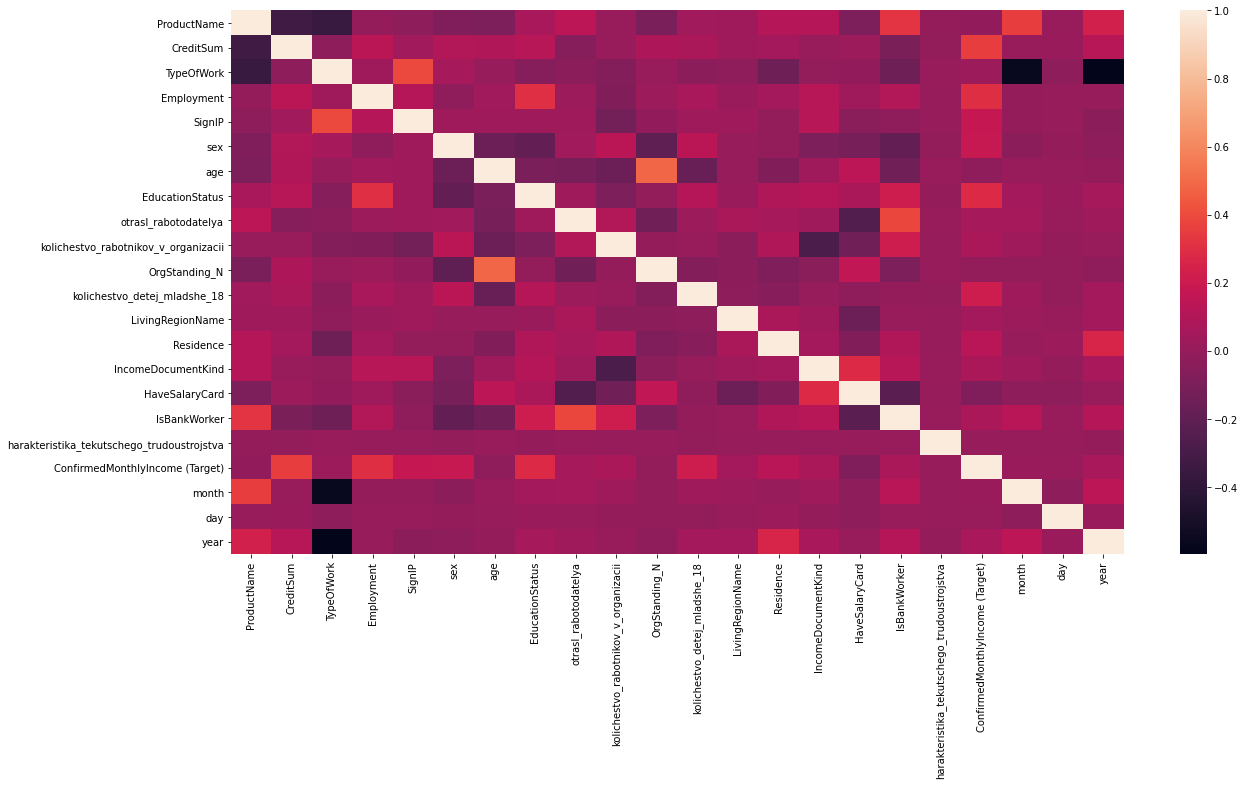

In [ ]:
plt.figure(figsize=(20,10))
sn.heatmap(data.corr())

##Задача регресии

### Нормализация данных



> Нормализация данных – это процедура предобработки входной информации (обучающих, тестовых и валидационных выборок, а также реальных данных), при которой значения признаков во входном векторе приводятся к некоторому заданному диапазону, например, [0…1] или [-1…1]. 


> Необходимость нормализации выборок данных обусловлена природой используемых алгоритмов и моделей. Исходные значения признаков могут изменяться в очень большом диапазоне и отличаться друг от друга на несколько порядков. Будучи разными по физическому смыслу, данные сильно различаются между собой по абсолютным величинам. Работа аналитических моделей машинного обучения с такими показателями окажется некорректной: дисбаланс между значениями признаков может вызвать неустойчивость работы модели, ухудшить результаты обучения и замедлить процесс моделирования.

> После нормализации все числовые значения входных признаков будут приведены к одинаковой области их изменения – некоторому узкому диапазону. Это позволит свести их вместе в одной модели Machine Learning и обеспечит корректную работу вычислительных алгоритмов.







Теперь проведем нормализацию данных с помощью MinMaxScaler()

In [ ]:
min_max_scaler = MinMaxScaler()
data_norm = data.copy()
data_norm = min_max_scaler.fit_transform(data_norm)

data_norm = pd.DataFrame(data_norm, columns=data.columns)

### Удаление выбросов от данных

Поиск возможных выбросов

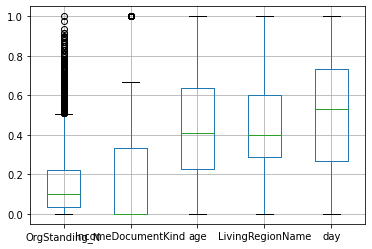

In [ ]:
numeric = ['OrgStanding_N', 'IncomeDocumentKind', 'age', 'LivingRegionName', 'day']
data_norm.boxplot(numeric)

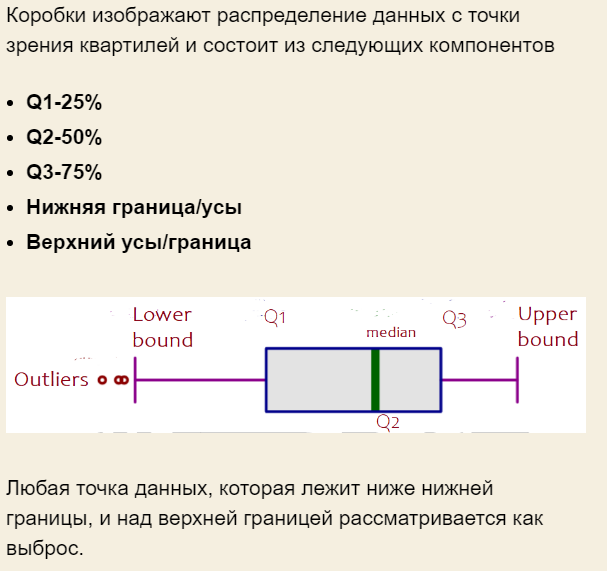

**Таким образом, ключевые выбросы содержатся в следующих колонках - 'OrgStanding_N', 'IncomeDocumentKind'**

Используя IQR, мы можем следовать приведенному ниже подходу для замены выбросов в нулевое значение:

1) Рассчитайте первый и третий квартиль (Q1 и Q3).

2) Кроме того, оцените межквартирный диапазон, IQR-Q1 Отказ

3) Оцените нижнюю границу, ниже * 1.5

4) Оцените верхнюю границу, Верхний * 1.5.
5) Замените точки данных, которые лежат за пределами нижней и верхней границы с Нулевое значение Отказ

In [ ]:
for x in ['OrgStanding_N','IncomeDocumentKind']:
  q75, q25 = np.percentile(data_norm.loc[:, x], [75,25])
  intr_qr = q75 - q25
  max = q75 + (1.5 * intr_qr)
  min = q25 - (1.5 * intr_qr)

  data_norm.loc[data_norm[x] < min, x] = np.nan
  data_norm.loc[data_norm[x] > max, x] = np.nan

data_norm.isnull().sum()

ProductName                                     0
CreditSum                                       0
TypeOfWork                                      0
Employment                                      0
SignIP                                          0
sex                                             0
age                                             0
EducationStatus                                 0
otrasl_rabotodatelya                            0
kolichestvo_rabotnikov_v_organizacii            0
OrgStanding_N                                 726
kolichestvo_detej_mladshe_18                    0
LivingRegionName                                0
Residence                                       0
IncomeDocumentKind                            769
HaveSalaryCard                                  0
IsBankWorker                                    0
harakteristika_tekutschego_trudoustrojstva      0
ConfirmedMonthlyIncome (Target)                 0
month                                           0


Таким образом, мы использовали numpy.percentile() - метод для расчета значений Q1 и Q3. Кроме того, мы заменили выбросы с numpy.nan как нулевые значения.

Избавляемся от нулевых значений (найденных выбросов)

In [ ]:
data_norm = data_norm.dropna(axis = 0)
data_norm.isnull().sum()

ProductName                                   0
CreditSum                                     0
TypeOfWork                                    0
Employment                                    0
SignIP                                        0
sex                                           0
age                                           0
EducationStatus                               0
otrasl_rabotodatelya                          0
kolichestvo_rabotnikov_v_organizacii          0
OrgStanding_N                                 0
kolichestvo_detej_mladshe_18                  0
LivingRegionName                              0
Residence                                     0
IncomeDocumentKind                            0
HaveSalaryCard                                0
IsBankWorker                                  0
harakteristika_tekutschego_trudoustrojstva    0
ConfirmedMonthlyIncome (Target)               0
month                                         0
day                                     

**Таким образом, все выбросы, присутствующие в наборе данных, были обнаружены и обработаны (удалены).**

### Отделаяем целевую переменную ConfirmedMonthlyIncome (Target) от общих признаков

Разбиваем нормализованные данные на тренировачные и тестоввые с помощью функции train_test_split()

In [ ]:
target_name = "ConfirmedMonthlyIncome (Target)"
target = data_norm[target_name]
data_norm.drop(target_name, axis=1, inplace=True)

data_train, data_test, target_values_train, target_values_test = train_test_split(data_norm,
                                                                                  target,
                                                                                  test_size=0.5, train_size=0.5,
                                                                                  random_state=42)

###Linear Regression



> Линейный регрессионный анализ используется для прогнозирования значения переменной на основе значения другой переменной. Переменная, которую требуется предсказать, называется зависимой переменной. Переменная, которая используется для предсказания значения другой переменной, называется независимой переменной.

> Эта форма анализа заключается в подборе таких коэффициентов линейного уравнения с одной или несколькими независимыми переменными, чтобы это уравнение наилучшим образом предсказывало значение зависимой переменной. Результат линейной регрессии может быть представлен в виде прямой на плоскости, минимизирующей расхождение между прогнозируемыми и фактическими значениями.





Строим линейную регресию и коэффициент ошибок

In [ ]:
model_regressor = LinearRegression()
model_regressor.fit(data_train, target_values_train)

print('Linear regression')

print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear model(test)".format(
    mean_absolute_error(target_values_test, model_regressor.predict(data_test)),
    mean_squared_error(target_values_test, model_regressor.predict(data_test)) ** 0.5,
    r2_score(target_values_test, model_regressor.predict(data_test))))

print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear model(train)".format(
    mean_absolute_error(target_values_train, model_regressor.predict(data_train)),
    mean_squared_error(target_values_train, model_regressor.predict(data_train)) ** 0.5,
    r2_score(target_values_train, model_regressor.predict(data_train))))

print()

Linear regression
MAE:    0.05, RMSE:    0.08, R2:    0.30 for linear model(test)
MAE:    0.05, RMSE:    0.08, R2:    0.30 for linear model(train)



Строим график рассеивания по получившимся моделям

TypeError: ignored

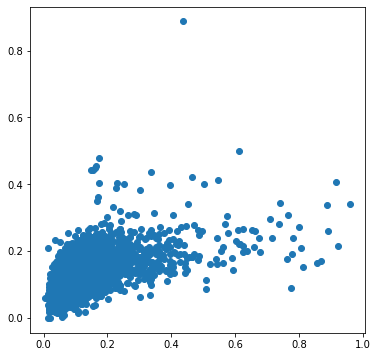

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(target_values_test, model_regressor.predict(data_test))
plt.plot([0, max(target_values_test)], [0, max(model_regressor.predict(data_test))])
plt.xlabel('Настоящее значение', fontsize=15)
plt.ylabel('Предсказанное значение', fontsize=15)
plt.title('Test data(Linear regression)', fontsize=15)
plt.show()

print()

plt.figure(figsize=(6, 6))
plt.scatter(target_values_train, model_regressor.predict(data_train))
plt.plot([0, max(target_values_train)], [0, max(model_regressor.predict(data_train))])
plt.xlabel('Настоящее значение', fontsize=15)
plt.ylabel('Предсказанное значение', fontsize=15)
plt.title('Train data(Linear regression)', fontsize=15)

###DecisionTreeRegressor

**Алгоритм дерева решений стал одним из наиболее часто используемых алгоритмов машинного обучения как в соревнованиях, таких как Kaggle, так и в бизнес-среде. Дерево решений может использоваться как для классификации, так и для решения задач регрессии.**

**Деревья решений можно резюмировать с помощью следующих пунктов:**

**Деревья решений - это модели прогнозирования, которые используют набор двоичных правил для вычисления целевого значения.
Каждое отдельное дерево представляет собой довольно простую модель с ветвями, узлами и листьями.**

**Дерево решений приходит к оценке, задавая серию вопросов к данным, каждый из которых сужает наши возможные значения до тех пор, пока модель не станет достаточно уверенной, чтобы сделать единственный прогноз. Порядок вопросов, а также их содержание определяются моделью. Кроме того, все вопросы задаются в форме «Верно / Неверно».**

Строим модель и выводим коэффициенты ошибок

In [ ]:
model_tree = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=4, min_samples_leaf=3,
                                   max_features=6)
model_tree.fit(data_train, target_values_train)

print('DecisionTree')

print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for tree model(test)".format(
    mean_absolute_error(target_values_test, model_tree.predict(data_test)),
    mean_squared_error(target_values_test, model_tree.predict(data_test)) ** 0.5,
    r2_score(target_values_test, model_tree.predict(data_test))))

print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for tree model(train)".format(
    mean_absolute_error(target_values_train, model_tree.predict(data_train)),
    mean_squared_error(target_values_train, model_tree.predict(data_train)) ** 0.5,
    r2_score(target_values_train, model_tree.predict(data_train))))

print()

DecisionTree
MAE:    0.05, RMSE:    0.08, R2:    0.22 for tree model(test)
MAE:    0.05, RMSE:    0.08, R2:    0.33 for tree model(train)



Для улучшения показателей через GridSearchCv()
подбираем оптимальные параметры для модели

In [ ]:
parametrs = {
    'max_depth': range(1, 20),
    'min_samples_leaf': range(1, 8),
    'min_samples_split': range(2, 6),
    'max_features': range(1, 9)}

# model_grid = DecisionTreeRegressor()
# grid = GridSearchCV(model_grid, parametrs, cv=5)
# grid.fit(data_train, target_values_train)
# print(grid.best_params_)

Строим стобчатую диаграмму, для того чтобы показать какие признаки оказали наибольшее влияние на предсказание нашей целевой переменной

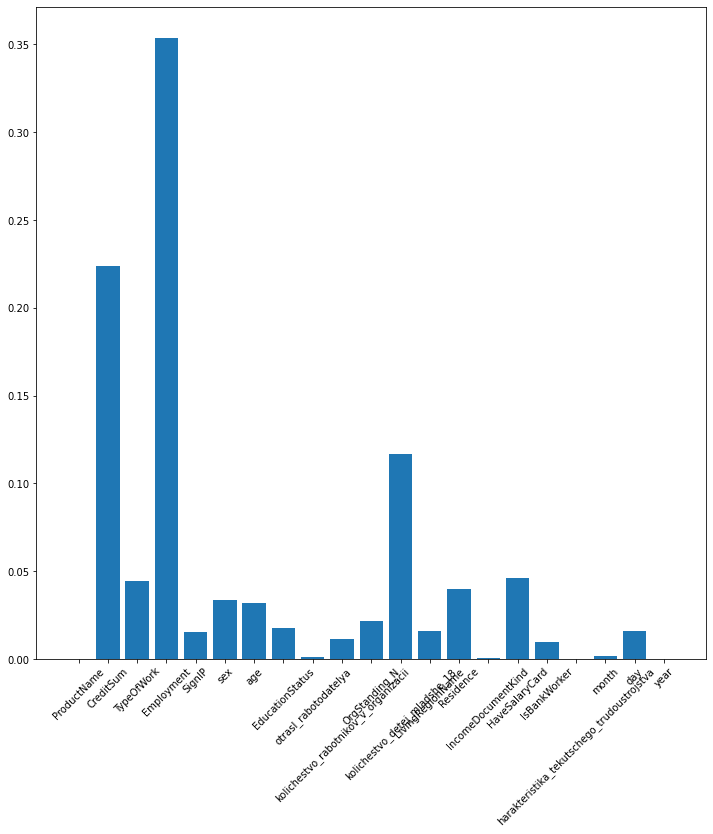

In [ ]:
plt.figure(figsize=(12, 12))
plt.bar(data_norm.columns, model_tree.feature_importances_)
plt.xticks(rotation=45)
plt.show()

Строим график рассеивания по данным, которые у нас получились

TypeError: ignored

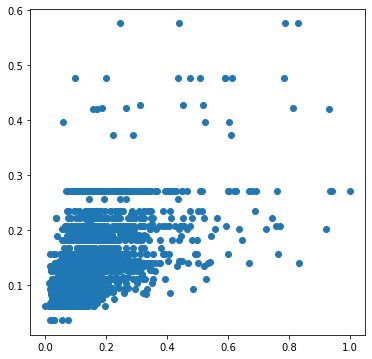

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(target_values_train, model_tree.predict(data_train))
plt.plot([0, max(target_values_train)], [0, max(model_tree.predict(data_train))])
plt.xlabel('Настоящее значение', fontsize=15)
plt.ylabel('Предсказанное значение', fontsize=15)
plt.title('Train data(Decision tree)', fontsize=15)

plt.figure(figsize=(6, 6))
plt.scatter(target_values_test, model_tree.predict(data_test))
plt.plot([0, max(target_values_test)], [0, max(model_tree.predict(data_test))])
plt.xlabel('Настоящее значение', fontsize=15)
plt.ylabel('Предсказанное значение', fontsize=15)
plt.title('Test data(Decision tree)', fontsize=15)

plt.show()

### RandomForestRegressor



> **RF (random forest) — это множество решающих деревьев. В задаче регрессии их ответы усредняются, в задаче классификации принимается решение голосованием по большинству. Все деревья строятся независимо по следующей схеме:**


> 1) Выбирается подвыборка обучающей выборки размера samplesize (м.б. с возвращением) – по ней строится дерево (для каждого дерева — своя подвыборка).

> 2) Для построения каждого расщепления в дереве просматриваем max_features случайных признаков (для каждого нового расщепления — свои случайные признаки).

> 3) Выбираем наилучшие признак и расщепление по нему (по заранее заданному критерию). Дерево строится, как правило, до исчерпания выборки (пока в листьях не останутся представители только одного класса).








Строим модель подбираем оптимальные параметры для модели через GridSearchCv()
И выводим коэфициенты ошибки

In [ ]:
real_forest = RandomForestRegressor(random_state=42, max_depth=7, n_estimators=50, min_samples_split=4,
                                    min_samples_leaf=4, n_jobs=5)
real_forest.fit(data_train, target_values_train)

random_forest = RandomForestRegressor()

random_parametrs = {'n_estimators': range(10, 51, 10),
                    'max_depth': range(1, 9, 2),
                    'min_samples_leaf': range(1, 8),
                    'min_samples_split': range(2, 8, 2)}


print('Random Tree')

print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for randomTree model(test)".format(
    mean_absolute_error(target_values_test, real_forest.predict(data_test)),
    mean_squared_error(target_values_test, real_forest.predict(data_test)) ** 0.5,
    r2_score(target_values_test, real_forest.predict(data_test))))

print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for randomTree model(train)".format(
    mean_absolute_error(target_values_train, real_forest.predict(data_train)),
    mean_squared_error(target_values_train, real_forest.predict(data_train)) ** 0.5,
    r2_score(target_values_train, real_forest.predict(data_train))))

Random Tree
MAE:    0.05, RMSE:    0.07, R2:    0.34 for randomTree model(test)
MAE:    0.04, RMSE:    0.07, R2:    0.49 for randomTree model(train)


Выводим какие признаки оказали влияние на предсказывание дохода 

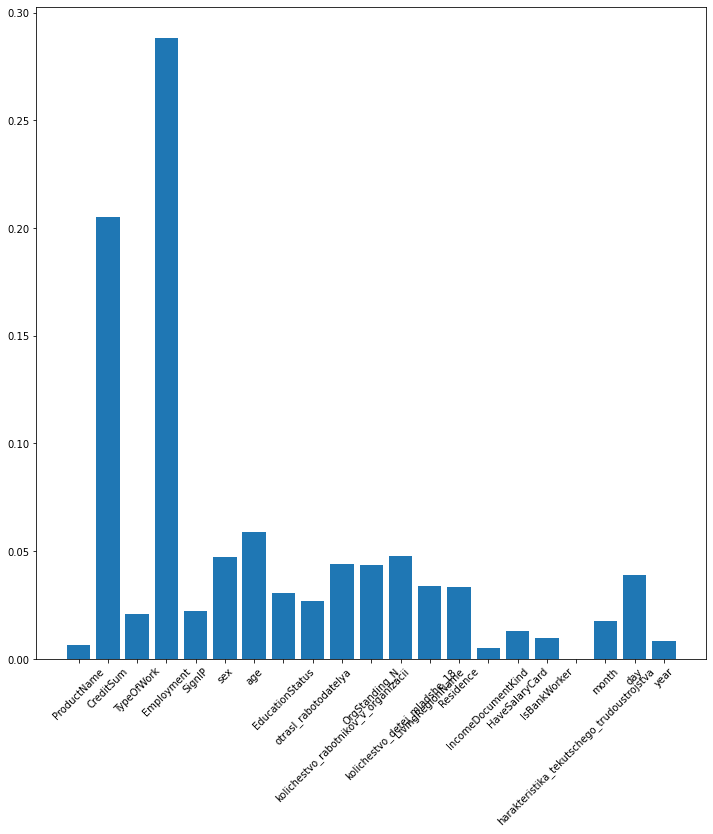

In [ ]:
plt.figure(figsize=(12, 12))
plt.bar(data_norm.columns, real_forest.feature_importances_)
plt.xticks(rotation=45)
plt.show()

Строим график рассеивания

TypeError: ignored

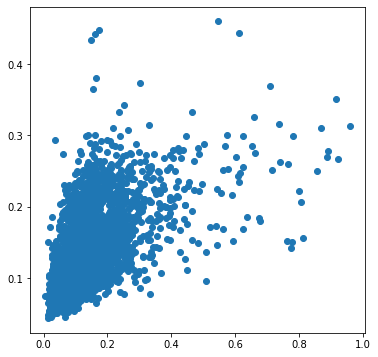

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(target_values_test, real_forest.predict(data_test))
plt.plot([0, max(target_values_test)], [0, max(real_forest.predict(data_test))])
plt.xlabel('Настоящее значение', fontsize=15)
plt.ylabel('Предсказанное значение', fontsize=15)
plt.title('Test data(Random forest)', fontsize=15)

print()

plt.figure(figsize=(6, 6))
plt.scatter(target_values_train, real_forest.predict(data_train))
plt.plot([0, max(target_values_train)], [0, max(real_forest.predict(data_train))])
plt.xlabel('Настоящее значение', fontsize=15)
plt.ylabel('Предсказанное значение', fontsize=15)
plt.title('Train data(Random forest)', fontsize=15)

### XGBRegressor

Для разнообразия построим модель через библиотеку xgboost и сравним с получившимися значениями

Построим модель, найдем коэффициенты ошибок

In [ ]:
model_xgb = xgb.XGBRegressor(random_state=42,
                             colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=60, nthread=4
                             )
print('XGB Regression')
model_xgb.fit(data_train, target_values_train)

print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for XGB model(test)".format(
    mean_absolute_error(target_values_test, model_xgb.predict(data_test)),
    mean_squared_error(target_values_test, model_xgb.predict(data_test)) ** 0.5,
    r2_score(target_values_test, model_xgb.predict(data_test))))

print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for XGB model(train)".format(
    mean_absolute_error(target_values_train, model_xgb.predict(data_train)),
    mean_squared_error(target_values_train, model_xgb.predict(data_train)) ** 0.5,
    r2_score(target_values_train, model_xgb.predict(data_train))))

parameters = {'nthread': [4],
              'learning_rate': [0.01, 0.03, 0.05],
              'max_depth': [3, 4, 5, 6, 7, 7],
              'colsample_bytree': [0.7, 0.8],
              'n_estimators': [500]}
# model_xgb_f = xgb.XGBRegressor()
# model_xgb_grid = GridSearchCV(model_xgb_f, parameters, cv=5, n_jobs=5, verbose=True)
# model_xgb_grid.fit(data_train, target_values_train)
# print(model_xgb_grid.best_params_)

XGB Regression
[18:46:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:    0.05, RMSE:    0.07, R2:    0.33 for XGB model(test)
MAE:    0.04, RMSE:    0.06, R2:    0.62 for XGB model(train)


Выводим график признаков модели

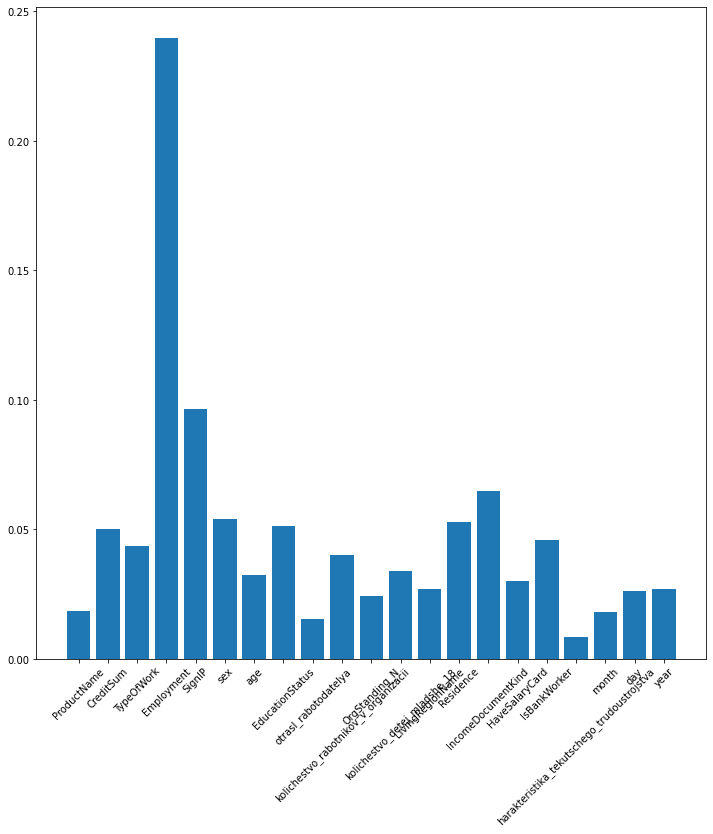

In [ ]:
plt.figure(figsize=(12, 12))
plt.bar(data_norm.columns, model_xgb.feature_importances_)
plt.xticks(rotation=45)
plt.show()

Строим график рассеивания

TypeError: ignored

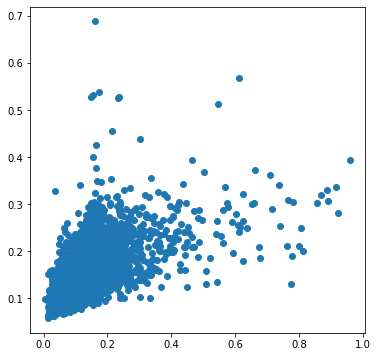

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(target_values_test, model_xgb.predict(data_test))
plt.plot([0, max(target_values_test)], [0, max(model_xgb.predict(data_test))])
plt.xlabel('Настоящее значение', fontsize=15)
plt.ylabel('Предсказанное значение', fontsize=15)
plt.title('Test data(Random forest)', fontsize=15)

print()

plt.figure(figsize=(6, 6))
plt.scatter(target_values_train, model_xgb.predict(data_train))
plt.plot([0, max(target_values_train)], [0, max(model_xgb.predict(data_train))])
plt.xlabel('Настоящее значение', fontsize=15)
plt.ylabel('Предсказанное значение', fontsize=15)
plt.title('Train data(Random forest)', fontsize=15)

### Подведение итогов

Выведем диаграмму с нашими моделями.
По диаграмме видим, что лучшей моделью среди всех оказалась RandomForest

[18:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


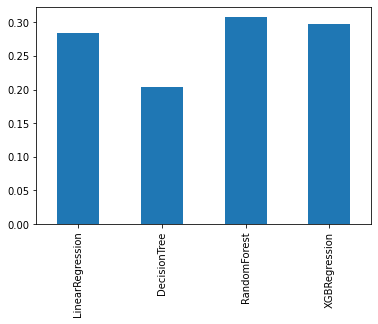

In [ ]:
kfold = 5  # количество подвыборок для валидации
itog_val = {}  # список для записи результатов кросс валидации разных алгоритмов

scores = cross_val_score(model_regressor, data_train, target_values_train, cv=kfold)
itog_val['LinearRegression'] = scores.mean()
itog_val['DecisionTree'] = cross_val_score(model_tree, data_train, target_values_train, cv=kfold).mean()
itog_val['RandomForest'] = cross_val_score(real_forest, data_train, target_values_train, cv=kfold).mean()
itog_val['XGBRegression'] = cross_val_score(model_xgb, data_train, target_values_train, cv=kfold).mean()

DataFrame.from_dict(data=itog_val, orient='index').plot(kind='bar', legend=False)

plt.show()

Поместим все результаты в таблицу

| Название модели 	|     Результаты     	|
|:-------------:	|:------------------:	|
| **Linear Regression**      	| 0.30 	|
| **Decision Tree** 	| 0.36 	|
| **Random Forest** 	| 0.52 	|
| **XGBRegressor**     	| 0.66  	|

Лучшую оценку мы получили на XGBRegressor. По итогам работы не были использованы для получения оценки методы обработки данных onehotencoding, так при их использовании немного ухудшались результаты модели. 

Таким образом были изучены основные методы для работы с данными, для тренировки моделей. Возможно если бы были созданы дополнительные уникальные признаки и получилось бы объединить данные с таблицей по транзакциям то результат по предсказаниям получился бы точнее.

## Задача классификации

### Удаление выбросов и нормализация

In [ ]:
data['ConfirmedMonthlyIncome (Target)'].describe()

count     10350.000000
mean      40140.956552
std       27222.633915
min        2393.120000
25%       24619.827500
50%       33774.970000
75%       46840.890000
max      293376.370000
Name: ConfirmedMonthlyIncome (Target), dtype: float64

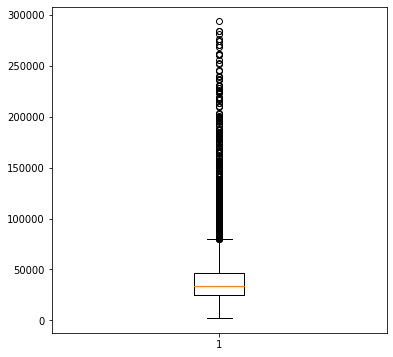

In [ ]:
plt.figure(figsize=(6, 6))
plt.boxplot(data['ConfirmedMonthlyIncome (Target)'])
plt.show()

In [ ]:
Q1 = data['ConfirmedMonthlyIncome (Target)'].quantile(0.25)
Q3 = data['ConfirmedMonthlyIncome (Target)'].quantile(0.75)
IQR = Q3 - Q1

df_IQR = data[(data['ConfirmedMonthlyIncome (Target)'] > (Q1 - 1.5 * IQR)) & (
            data['ConfirmedMonthlyIncome (Target)'] < (Q3 + 1.5 * IQR))]
median = df_IQR['ConfirmedMonthlyIncome (Target)'].median()

In [ ]:
data["ConfirmedMonthlyIncome (Target)"] = np.where(data['ConfirmedMonthlyIncome (Target)'] > Q1, median,
                                                       data['ConfirmedMonthlyIncome (Target)'])

In [ ]:
def koef_income(row, Q1, median):
    if row < median:
        return 1
    elif row >= median:
        return 2

In [ ]:
data['koef_income'] = data.apply(lambda row: koef_income(row['ConfirmedMonthlyIncome (Target)'], Q1, median),
                                     axis=1)
print(data['koef_income'].value_counts())

2    7762
1    2588
Name: koef_income, dtype: int64


In [ ]:
data.drop(["ConfirmedMonthlyIncome (Target)"], axis=1, inplace=True)

In [ ]:
min_max_scaler = MinMaxScaler()
data_norm = data.copy()
data_norm = min_max_scaler.fit_transform(data_norm)

data_norm = pd.DataFrame(data_norm, columns=data.columns)

for x in ['OrgStanding_N','IncomeDocumentKind']:
  q75, q25 = np.percentile(data_norm.loc[:, x], [75,25])
  intr_qr = q75 - q25
  max = q75 + (1.5 * intr_qr)
  min = q25 - (1.5 * intr_qr)

  data_norm.loc[data_norm[x] < min, x] = np.nan
  data_norm.loc[data_norm[x] > max, x] = np.nan

data_norm.isnull().sum()

data_norm = data_norm.dropna(axis = 0)
data_norm.isnull().sum()


ProductName                                   0
CreditSum                                     0
TypeOfWork                                    0
Employment                                    0
SignIP                                        0
sex                                           0
age                                           0
EducationStatus                               0
otrasl_rabotodatelya                          0
kolichestvo_rabotnikov_v_organizacii          0
OrgStanding_N                                 0
kolichestvo_detej_mladshe_18                  0
LivingRegionName                              0
Residence                                     0
IncomeDocumentKind                            0
HaveSalaryCard                                0
IsBankWorker                                  0
harakteristika_tekutschego_trudoustrojstva    0
month                                         0
day                                           0
year                                    

In [ ]:
target_name = "koef_income"
target = data_norm[target_name]
data_norm.drop(target_name, axis=1, inplace=True)

data_train, data_test, target_values_train, target_values_test = train_test_split(data_norm,
                                                                                      target, test_size=0.5,
                                                                                      train_size=0.5,
                                                                                      random_state=42)

### DecisionTreeClassifier

***Это метод поддержки принятия решений, основанный на использовании древовидного графа: модели принятия решений, которая учитывает их потенциальные последствия (с расчётом вероятности наступления того или иного события), эффективность, ресурсозатратность. Для бизнес-процессов это дерево складывается из минимального числа вопросов, предполагающих однозначный ответ — «да» или «нет». Последовательно дав ответы на все эти вопросы, мы приходим к правильному выбору. Методологические преимущества дерева принятия решений – в том, что оно структурирует и систематизирует проблему, а итоговое решение принимается на основе логических выводов. Решающее дерево- покрывающий набор конъюнкций. Требование максимизации информативности конъюнкций означает, что каждая из них должна выделять как можно больше обучающих объектов, допуская при этом как можно меньше ошибок. Для повышения обобщающей способности решающего дерева число листьев должно быть как можно меньше, и они должны покрывать подвыборки примерно одинаковой мощности.***

Строим модель по DecisionTreeClassifier и по accuracy_score оцениваем нашу модель

In [ ]:
print(target_values_test.unique())
model = DecisionTreeClassifier(max_depth=4, random_state=42, criterion='gini', min_samples_leaf=2,
                                   min_samples_split=2)
model.fit(data_train, target_values_train)
model.predict(data_train)
model.predict(data_test)

print('\nGini classifier')
print('test data')
print(accuracy_score(target_values_test, model.predict(data_test)))
print("train data")
print(accuracy_score(target_values_train, model.predict(data_train)))

[0. 1.]

Gini classifier
test data
0.7673211464680659
train data
0.7731888964116452


In [ ]:
parameters = {'min_samples_split': np.arange(2, 10), 'max_depth': np.arange(2, 10),
                  'criterion': ['gini', 'entropy'], 'min_samples_leaf': range(1, 8)}

# model_decision_grid = DecisionTreeClassifier()
# model_grid = GridSearchCV(model_decision_grid, parameters, cv=5)
# model_grid.fit(data_train, target_values_train)
# print(model_grid.best_params_)

Строим roc-кривую и выводим показатель roc кривой для оценки качества модели

Roc score decision tree
0.7530580056686985



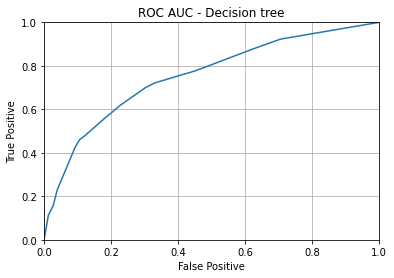

In [ ]:
pred_proba = model.predict_proba(data_test)
print('Roc score decision tree')
print(roc_auc_score(target_values_test,pred_proba[:,1]))
print()
fpr, tpr, thresholds = roc_curve(target_values_test, pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title("ROC AUC - Decision tree")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.grid(True)
plt.show()

###Random Forest Classifier

**Случайные леса - это алгоритм обучения с учителем. Его можно использовать как для классификации, так и для регрессии. Это также самый гибкий и простой в использовании алгоритм. Алгоритм сочетает в себе две основные идеи: метод бэггинга Бреймана, и метод случайных подпространств, предложенный Tin Kam Ho.Лес состоит из деревьев. Говорят, что чем больше деревьев, тем крепче лес. Случайные леса создают деревья решений для случайно выбранных выборок данных, получают прогнозы от каждого дерева и выбирают лучшее решение посредством голосования. Это также довольно хороший индикатор важности функции.**

**Случайные леса имеют множество приложений, таких как механизмы рекомендаций, классификация изображений и выбор функций. Его можно использовать для классификации лояльных соискателей кредита, выявления мошенничества и прогнозирования заболеваний. Он лежит в основе алгоритма Борута, который выбирает важные функции в наборе данных.**

In [ ]:
model_forest = RandomForestClassifier(max_depth=8, criterion='entropy', random_state=42, min_samples_split=3,
                                          min_samples_leaf=3)
model_forest.fit(data_train, target_values_train)
model_forest.predict(data_train)
model_forest.predict(data_test)

print('\nEntropy forest random')
print('test data')
print(accuracy_score(target_values_test, model_forest.predict(data_test)))
print("train data")
print(accuracy_score(target_values_train, model_forest.predict(data_train)))

pred_proba = model_forest.predict_proba(data_test)



Entropy forest random
test data
0.7957571654254119
train data
0.8386368765515685


Строим roc-кривую и выводим roc - оценку модели

In [ ]:
print('Roc score random tree')
print(roc_auc_score(target_values_test,pred_proba[:,1]))
print()

Roc score random tree
0.8336185009684938



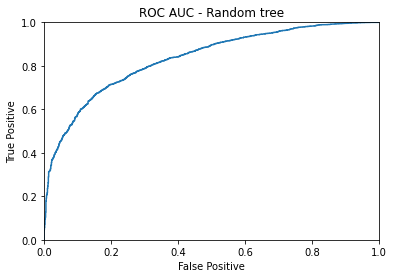

In [ ]:
fpr, tpr, thresholds = roc_curve(target_values_test, pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title("ROC AUC - Random tree")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.show()

###Xgb Classifier

In [ ]:
model_xgb = xgb.XGBClassifier(random_state=42, max_depth=3, n_estimators=50, colsample_bytree=0.8, reg_alpha=1,
                                  gamma=0.2, learning_rate=0.3,min_child_weight=1)
model_xgb.fit(data_train, target_values_train)

model_xgb.predict(data_train)
model_xgb.predict(data_test)

print('\nXGB')
print('test data')
print(accuracy_score(target_values_test, model_xgb.predict(data_test)))
print("train data")
print(accuracy_score(target_values_train, model_xgb.predict(data_train)))

pred_proba = model_xgb.predict_proba(data_test)


XGB
test data
0.7998194538478899
train data
0.8395396073121192


Строим roc-кривую и оцениваем модель

In [ ]:
print('Roc score xgb classifier tree')
print(roc_auc_score(target_values_test,pred_proba[:,1]))
print()

Roc score xgb classifier tree
0.8358855699887282



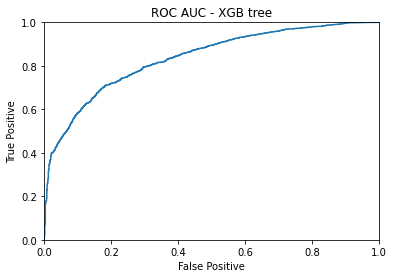

In [ ]:
fpr, tpr, thresholds = roc_curve(target_values_test, pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title("ROC AUC - XGB tree")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.show()

### Подведение итогов

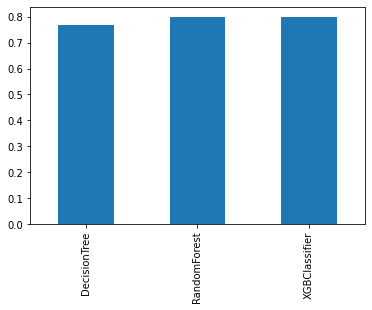

In [ ]:
kfold = 5  # количество подвыборок для валидации
itog_val = {}  # список для записи результатов кросс валидации разных алгоритмов

itog_val['DecisionTree'] = cross_val_score(model, data_train, target_values_train, cv=kfold).mean()
itog_val['RandomForest'] = cross_val_score(model_forest, data_train, target_values_train, cv=kfold).mean()
itog_val['XGBClassifier'] = cross_val_score(model_xgb, data_train, target_values_train, cv=kfold).mean()

DataFrame.from_dict(data=itog_val, orient='index').plot(kind='bar', legend=False)

plt.show()


**Таким образом, лучшую оценку мы получили на XGBClassifier. По roc_score она сотавила 0.835. По итогам работы не были использованы для получения оценки методы обработки данных onehotencoding, так при их использовании немного ухудшались результаты модели.**